In [19]:
import os
import pandas as pd
import numpy as np
import requests as req
import json as JSON
import matplotlib.pyplot as plt

URL = 'http://ergast.com/api/f1'

In [ ]:
'''
years = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

for year in years:
    for round in range(1, 25):
        try:
            race = req.get(f'{URL}/{year}/{round}/results.json') # fetch race

            # make new json file and populate it with fetched race json
            with open(f'data/jsons/{year}_round{round}_race.json', 'w') as f:
                JSON.dump(race.json(), f, indent=4)
        except Exception as e:
            print(f'An error occurred: {e}')
            continue
'''

In [ ]:
'''
for json in os.listdir('data/jsons'):
    json_path = os.path.join('data/jsons', json) # build path of each json

    if os.path.isfile(json_path): 
        with open(json_path, 'r') as f: # load json into a variable for modification
            race = JSON.load(f)
        
        race = race['MRData']['RaceTable']['Races'][0] # remove extra info surrounding the needed data
        with open(json_path, 'w') as f: # overwite the original json with the modified one
            JSON.dump(race, f, indent=4)
'''

In [3]:
with open('data/jsons/2004_round1_race.json', 'r') as f:
    test = JSON.load(f)

print(test['Results'][0]['FastestLap'])

{'rank': '1', 'lap': '29', 'Time': {'time': '1:24.125'}, 'AverageSpeed': {'units': 'kph', 'speed': '226.933'}}


In [16]:
instances = [] # initialize collection of rows
count = 0

for race in os.listdir('data/jsons'):
    race_path = os.path.join('data/jsons', race) # build path of race

    if os.path.isfile(race_path):
        with open(race_path, 'r') as f: # load race json in a variable for extraction
            race_data = JSON.load(f)
    else:
        print(f'This file does not exist: {race_path}')
    count += 1
    # create a dictionary for this specific instance
    for result in race_data['Results']:
        instance = {}
        instance['finishing_pos'] = int(result['position'])
        instance['circuit_id'] = race_data['Circuit']['circuitId']
        instance['driver_id'] = result['Driver']['driverId']
        instance['constructor_id'] = result['Constructor']['constructorId']
        instance['grid_pos'] = int(result['grid'])
        instance['status'] = result['status'] if result['status'][0] != '+' else 'Finished'

        instance['fastest_lap_missing'] = 0
        try:
            instance['fastest_lap'] = result['FastestLap']['Time']['time']
            instance['fastest_lap_avg_speed'] = result['FastestLap']['AverageSpeed']['speed']
        except Exception:
            instance['fastest_lap'] = 300
            instance['fastest_lap_avg_speed'] = 0
            instance['fastest_lap_missing'] = 1
        
        instances.append(instance)
raw_df = pd.DataFrame(instances)
raw_df

,finishing_pos,circuit_id,driver_id,constructor_id,grid_pos,status,fastest_lap_missing,fastest_lap,fastest_lap_avg_speed
0,1,hungaroring,webber,red_bull,2,Finished,0,1:22.651,190.821
1,2,hungaroring,alonso,ferrari,3,Finished,0,1:23.195,189.573
2,3,hungaroring,vettel,red_bull,1,Finished,0,1:22.362,191.491
3,4,hungaroring,massa,ferrari,4,Finished,0,1:23.329,189.269
4,5,hungaroring,petrov,renault,7,Finished,0,1:23.799,188.207
...,...,...,...,...,...,...,...,...,...
8645,16,monza,kevin_magnussen,haas,11,Finished,0,1:23.768,248.959
8646,17,monza,ricciardo,red_bull,19,Engine,0,1:25.692,243.369
8647,18,monza,alonso,mclaren,13,Engine,0,1:25.229,244.691
8648,19,monza,brendon_hartley,toro_rosso,16,Brakes,0,1:27.009,239.685


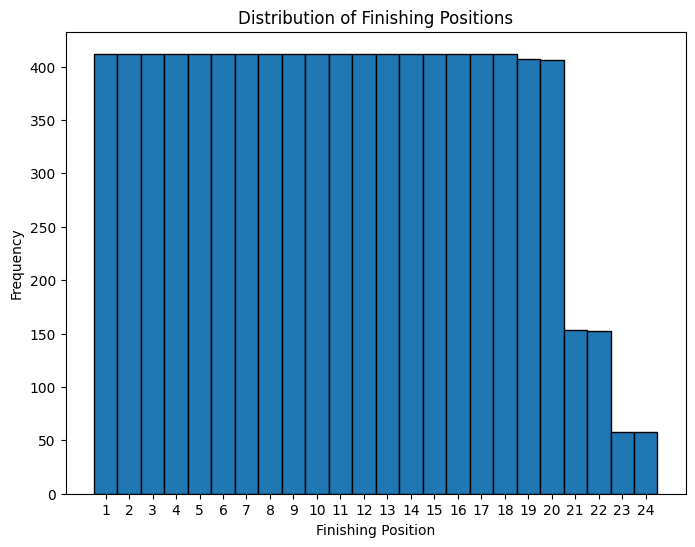

In [24]:
plt.figure(figsize=(8, 6))

# Determine the range of positions.
# Assuming finishing positions start at 1, and max(df['position']) gives the highest finishing position.
max_position = raw_df['finishing_pos'].max()

# Create a histogram where bins are defined for each finishing position.
plt.hist(raw_df['finishing_pos'], bins=range(1, max_position + 2), edgecolor='black', align='left')

# Add a title and axis labels
plt.title('Distribution of Finishing Positions')
plt.xlabel('Finishing Position')
plt.ylabel('Frequency')

# Set the x-axis ticks to be each finishing position
plt.xticks(range(1, max_position + 1))

plt.show()